## Diabetes Prediction

##### The dataset is download from kaggle : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
#import modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("D:\Coding Projects\Python\Data Sets\DiabetesPrediction\diabetes_prediction_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
#checking null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

### Hangling categorical values

In [7]:
#handling gender column
gender_map={'Male':0 , 'Female':1 , 'Other':2}
df['gender'] = df['gender'].map(gender_map)

### checking the smoling_history column

In [8]:
df_copy = df.copy()

In [9]:
smokehist_map = {'never':0, 'No Info':1, 'current':2, 'former':3, 'ever':4, 'not current':5}
df_copy['smoking_history'] = df_copy['smoking_history'].map(smokehist_map)

In [10]:
df_copy.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.030061,-0.014517,-0.077933,-0.053232,0.023009,-0.020086,-0.017165,-0.037752
age,0.030061,1.000000,0.251171,0.233354,0.143647,0.337396,0.101354,0.110672,0.258008
hypertension,-0.014517,0.251171,1.000000,0.121262,0.031913,0.147666,0.080939,0.084429,0.197823
heart_disease,-0.077933,0.233354,0.121262,1.000000,0.071547,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.053232,0.143647,0.031913,0.071547,1.000000,0.068321,0.023195,0.023031,0.057908
bmi,0.023009,0.337396,0.147666,0.061198,0.068321,1.000000,0.082997,0.091261,0.214357
HbA1c_level,-0.020086,0.101354,0.080939,0.067589,0.023195,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,-0.017165,0.110672,0.084429,0.070066,0.023031,0.091261,0.166733,1.000000,0.419558
diabetes,-0.037752,0.258008,0.197823,0.171727,0.057908,0.214357,0.400660,0.419558,1.000000


In [11]:
df_copy[df_copy['smoking_history']==1]['diabetes'].value_counts()

0    34362
1     1454
Name: diabetes, dtype: int64

In [12]:
## Based on the above obeservation most of the people having no diabetes so I am replacing the No Info column with Never

In [13]:
smokehist_map = {'never':0, 'No Info':0, 'current':1, 'former':2, 'ever':3, 'not current':4}
df['smoking_history'] = df['smoking_history'].map(smokehist_map)

In [14]:
df.smoking_history.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


### converting age from float to int to save space

In [16]:
df['age'].astype(int)

0        80
1        54
2        28
3        36
4        76
         ..
99995    80
99996     2
99997    66
99998    24
99999    57
Name: age, Length: 100000, dtype: int32

### finding the coorelation 

In [17]:
corr = df.corr()

In [18]:
corr

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.030061,-0.014517,-0.077933,-0.025534,0.023009,-0.020086,-0.017165,-0.037752
age,0.030061,1.000000,0.251171,0.233354,0.201143,0.337396,0.101354,0.110672,0.258008
hypertension,-0.014517,0.251171,1.000000,0.121262,0.057237,0.147666,0.080939,0.084429,0.197823
heart_disease,-0.077933,0.233354,0.121262,1.000000,0.074818,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.025534,0.201143,0.057237,0.074818,1.000000,0.117928,0.032522,0.033038,0.081431
bmi,0.023009,0.337396,0.147666,0.061198,0.117928,1.000000,0.082997,0.091261,0.214357
HbA1c_level,-0.020086,0.101354,0.080939,0.067589,0.032522,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,-0.017165,0.110672,0.084429,0.070066,0.033038,0.091261,0.166733,1.000000,0.419558
diabetes,-0.037752,0.258008,0.197823,0.171727,0.081431,0.214357,0.400660,0.419558,1.000000


<Axes: >

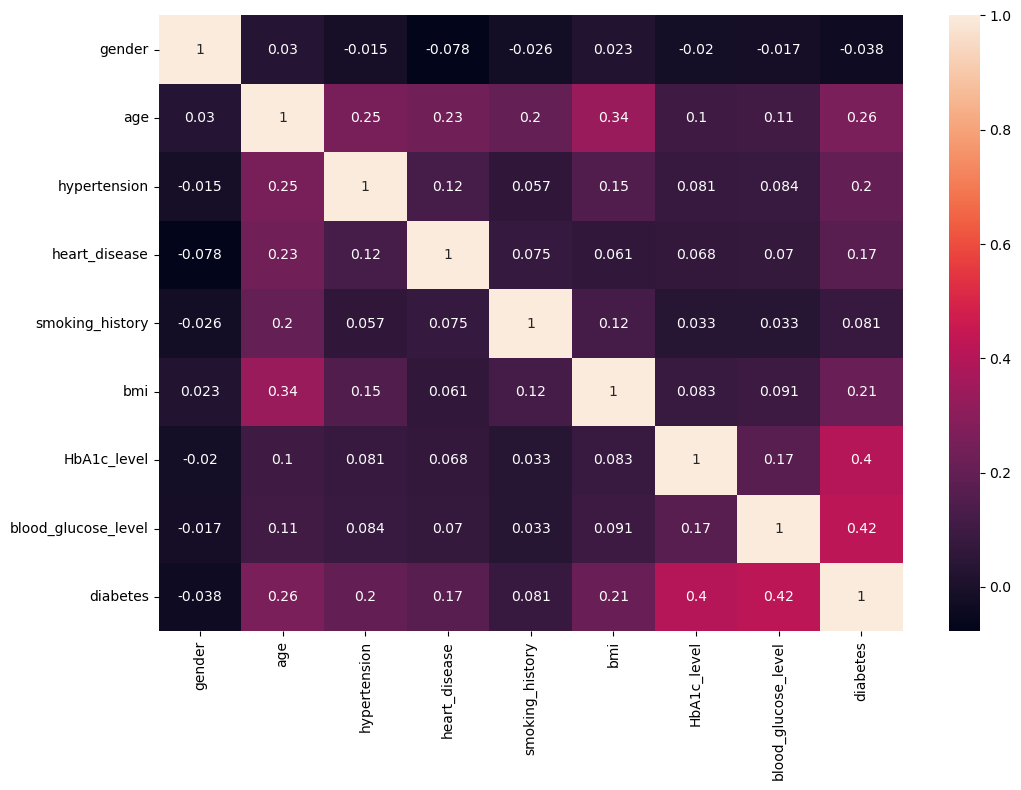

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , annot=True)    


In [20]:
# from the above index we can observe that there is no feature is higly correlated features greater than 0.95

In [21]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [22]:
### visualizing the data

<Axes: xlabel='hypertension', ylabel='bmi'>

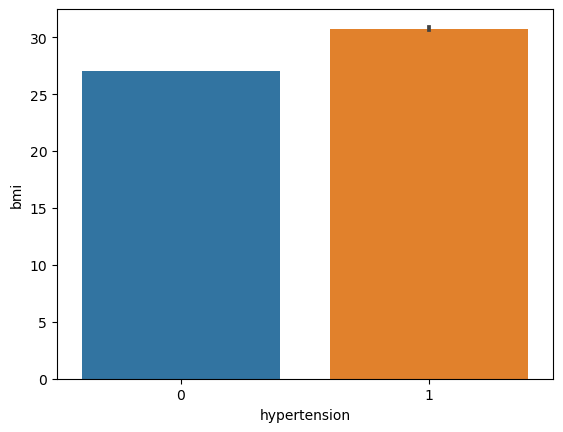

In [23]:
sns.barplot( x = "hypertension", 
                 y = "bmi", 
                 data = df)    

<Axes: xlabel='heart_disease', ylabel='diabetes'>

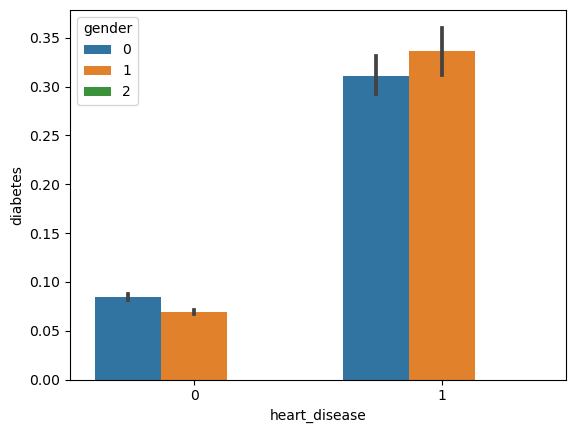

In [24]:
sns.barplot( x = "heart_disease", 
                 y = "diabetes", 
                 data = df,
                  hue = 'gender')  

<Axes: xlabel='diabetes', ylabel='age'>

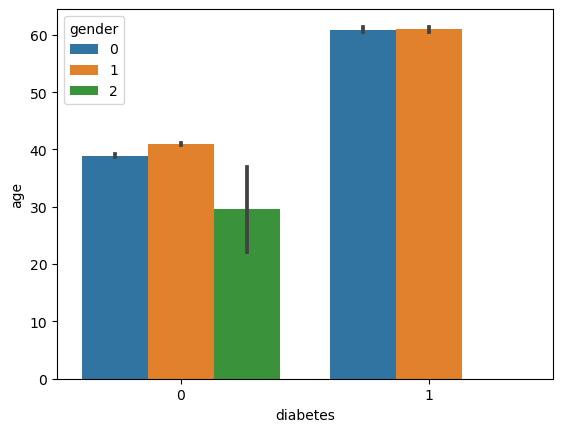

In [25]:
sns.barplot( x = "diabetes", 
            y = "age", 
            data = df,
            hue = "gender") 

### spliting the dataset into training and testing

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(columns = 'diabetes')
y = df['diabetes']        

In [28]:
# X,y

In [29]:
xtrain , xtest , ytrain ,ytest = train_test_split(X,y,test_size = 0.30 , random_state = 1)  

In [30]:
xtrain.shape , ytrain.shape , xtest.shape , ytest.shape     

((70000, 8), (70000,), (30000, 8), (30000,))

In [31]:
## Using the normalisation technique -- StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [33]:
scaled_xtrain = sc.fit_transform(xtrain)
scaled_xtest = sc.transform(xtest)

In [34]:
# scaled_xtest , scaled_xtrain


## model selection

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=90 )

In [37]:
rf.fit(scaled_xtrain,ytrain)

RandomForestClassifier(n_estimators=90)

In [38]:
ypred = rf.predict(scaled_xtest)

## model prediction 

In [39]:
ypredtrain = rf.predict(scaled_xtrain)

## model accuracy

In [40]:
from sklearn.metrics import accuracy_score 

In [41]:
# train accuracy     
accuracy_score(ypredtrain,ytrain)

0.9988857142857143

In [42]:
#test accuracy
accuracy_score(ytest,ypred)

0.9704333333333334

In [43]:
df_copy.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [44]:
df_copy['HbA1c_level'].unique()

array([6.6, 5.7, 5. , 4.8, 6.5, 6.1, 6. , 5.8, 3.5, 6.2, 4. , 4.5, 9. ,
       7. , 8.8, 8.2, 7.5, 6.8])

In [45]:
smokehist_map

{'never': 0,
 'No Info': 0,
 'current': 1,
 'former': 2,
 'ever': 3,
 'not current': 4}

In [46]:
#saving the model  

In [47]:
import pickle as pk

In [48]:
pk.dump(rf , open("diabetesPrediction.pkl","wb"))

In [49]:
pk.dump(sc ,open("scaler.pkl","wb"))

In [50]:
xtest

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
43660,1,73.0,0,0,0,26.62,5.0,155
87278,1,35.0,0,0,0,27.32,4.5,130
14317,0,38.0,0,0,0,27.32,6.2,130
81932,1,75.0,0,0,0,31.11,6.2,159
95321,1,51.0,0,0,0,39.57,6.2,240
...,...,...,...,...,...,...,...,...
994,1,19.0,0,0,0,30.45,4.8,130
42287,1,56.0,0,0,2,27.13,6.5,158
4967,1,38.0,0,0,0,25.55,5.8,100
47725,1,69.0,0,0,0,41.04,6.1,158
